과제 #1은 IRIS 데이터를 아래와 같이 불러와서    
간단한 전처리(스케일링 등)와 EDA를 하고,     
'#1_참고자료.html'을 참고하여 KNN에 GridSearchCV를 적용해보는 과제입니다!   
그리고 BestParameter와 BestScore, TestsetScore를 구합니다.

In [38]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
plt.style.use('seaborn') 
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [2]:
# 아이리스 데이터 불러오기
iris = load_iris()

In [10]:
#iris의 정보를 확인하기 위해 실행해본다.
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
#iris.data -> features, iris.target -> labels
X = iris.data
y = iris.target

- About data : https://www.kaggle.com/uciml/iris

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#스케일링 과정 빠져있음!

In [15]:
#EDA를 하기위해 일단X,y를 df형태로 만든다.
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

#target인 y를 문자열로 바꿔준다.
df['target'] = df['target'].map({0:"setosa", 1:"versicolor", 2:"virginica"})
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [16]:
#상위데이터 10개확인
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [17]:
# 데이터의 구조 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
#결측치 확인
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

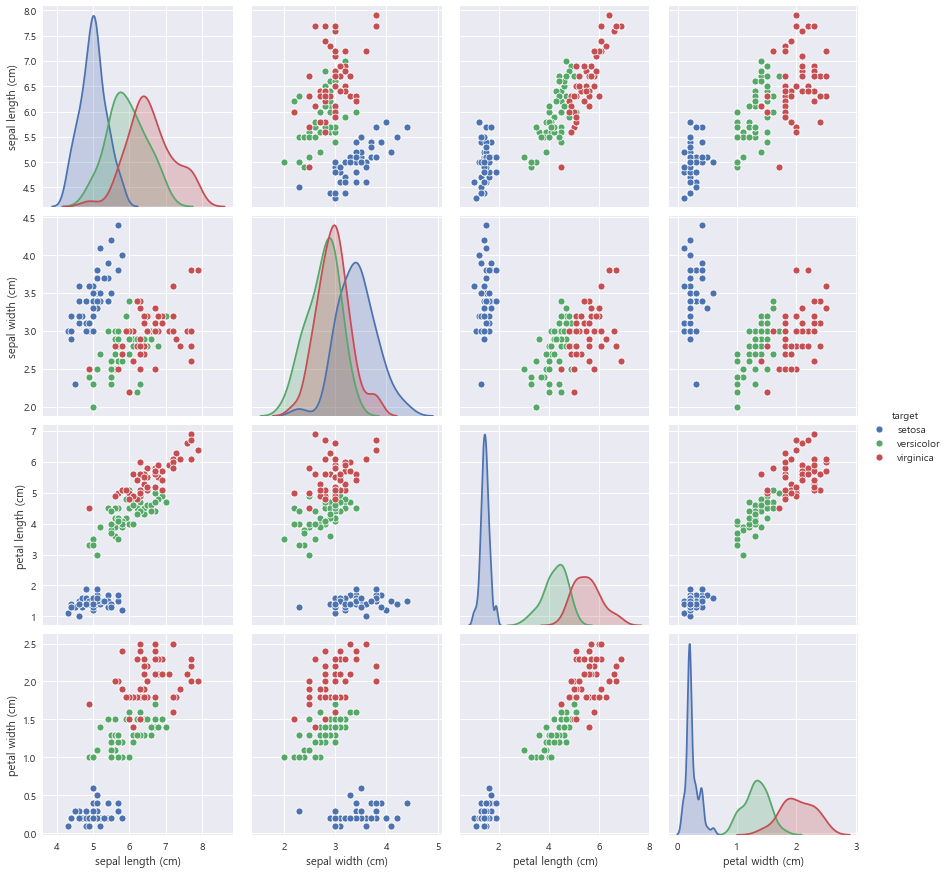

In [26]:
#target인 y에 따라 어떻게 분포되고 있는지 알기 위해서 그려본다.
sns.pairplot(df,hue="target", height=3)
plt.show()

In [28]:
# Train, Test 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=48)

- Documentation for "KNeighborsClassifier" : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [33]:
# build KNN model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

In [34]:
# train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
# get the predict value(y_pred) from X_test
y_pred = knn.predict(X_test)

In [36]:
print('accuracy: ', knn.score(X_test, y_test))

accuracy:  0.9333333333333333


In [40]:
#Hyperparameter Tuning
#Grid Search CV
grid_params = {
    'n_neighbors' : [3,5,11,19],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

n_neighbors : 이웃의 수, default = 5 <br>
weights' : 예측에 사용되는 중량 기능. 가능한 값, default = 'uniform'(각 이웃에게 동등한 가중치)<br>
metric : 거리측정 방식, default= 'minkowski'

In [46]:
gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    cv = 10, #정확한 평가를 위해 cv = 10으로 규정
    )

In [47]:
gs_results = gs.fit(X_train, y_train)

In [48]:
#가장 좋은 결과를 얻는 그리드를 출력함
print("Best Parameter: {}".format(gs.best_params_))

Best Parameter: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}


In [49]:
#grid_search의 최종 스코어를 출력함
print("Best Cross-validity Score: {:.3f}".format(gs.best_score_))

Best Cross-validity Score: 0.983


In [50]:
#Test 데이터에 대해 grid_search 알고리즘을 적용함
print("Test set Score: {:.3f}".format(gs.score(X_test, y_test)))

Test set Score: 0.933
